In [3]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 7

# problem: Mange perioder, værdien af HK i første periode er meget lavt, hvis vi ikke har HK, måske ændre til type? Type med højt return og type med lavt return

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


# Solve the model

In [4]:
# compile c++ files
#T = 20
##sigma_HK = 0.5
#sigma_HK_init = 1.0
#sigma_love = 0.031
specs = {}
for T in [10 , 20 ]:
    for sigma_HK in [0.1,0.5, 1.0]:
        for sigma_HK_init in [0.1, 0.5, 1.0]:
            for sigma_love in [0.031 , 0.0001]:
                #print(T)
                #specs = specs | {f'model NC, NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_HK':sigma_HK, 'sigma_HK_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}}
                specs.update({f'model_FC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':0}}})
                specs.update({f'model_LC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':1}}})
                specs.update({f'model_NC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}})
print(specs)


#sigma_HK_init er stort og T er mindre, det burde give, at initialt betyder noget ved FC, ellers er init_HK er kun en periode ud af 20 --> påvirker ikke barganing

{'model_FC_NO_HK_T10_sHK0.1_initHK0.1_SL0.031': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 7, 'bargaining': 0}}, 'model_LC_NO_HK_T10_sHK0.1_initHK0.1_SL0.031': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 7, 'bargaining': 1}}, 'model_NC_NO_HK_T10_sHK0.1_initHK0.1_SL0.031': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 7, 'bargaining': 2}}, 'model_FC_NO_HK_T10_sHK0.1_initHK0.1_SL0.0001': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.0001, 'do_HK': False, 'threads': 7, 'bargaining': 0}}, 'model_LC_NO_HK_T10_sHK0.1_initHK0.1_SL0.0001': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.0001, 'do_HK': False, 'threads': 7, 'bargaining': 1}}, 'model_NC_NO_HK

In [5]:

specs = {}
T = 10
sigma_love = 0.031
sigma_HK = 0.1
sigma_HK_init = 0.1
#specs.update({f'model_FC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':0}}})
#specs.update({f'model_LC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC_NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}})

specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':0}}})
specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':1}}})
specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'sigma_K':sigma_HK, 'sigma_K_init': sigma_HK_init, 'sigma_love': sigma_love, 'do_HK': False, 'threads':threads,'bargaining':2}}})
print(specs)



# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    print(f'{name} loading...',end='')
    
    # setup model
    models[name] = LimitedCommitmentModelClass(name=name,par=spec['par'])
    models[name].spec = spec

    compile_now = True if do_compile & (m==0) else False
    models[name].link_to_cpp(force_compile=compile_now)
    
    print(' solving...')
    %time models[name].solve() 

        #Save the data 
    T = models[name].par.T
    print(' saving...')
    models[name].sim.init_love[:] = 0.2
    models[name].sim.init_A[:] = 0.0
    np.random.seed(models[name].par.seed)
    data1 = Estimate.create_data_new(models[name],start_p = 1, end_p = T-1, to_xl = True, name_xl = name)
        
    print(f'couple {np.mean(models[name].sim.couple,0)}')
    print(f'power {np.mean(models[name].sim.power,0)}')
    print(f'max_kw {np.max(models[name].sim.Kw,0)}')
    print(f' mean Kw {np.mean(models[name].sim.Kw,0)}')
    print(f' mean labor w {np.mean(models[name].sim.labor_w,0)}')
    print(f' mean A {np.nanmean(models[name].sim.A,0)}')

    #data1 = Estimate.create_data_new(model,start_p = 1, end_p = 2, to_xl = True, name_xl = name)

{'model_FC': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 7, 'bargaining': 0}}, 'model_LC': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 7, 'bargaining': 1}}, 'model_NC': {'latexname': 'limited', 'par': {'T': 10, 'sigma_K': 0.1, 'sigma_K_init': 0.1, 'sigma_love': 0.031, 'do_HK': False, 'threads': 7, 'bargaining': 2}}}
model_FC loading... solving...
CPU times: total: 20min 39s
Wall time: 3min 57s
 saving...
couple [1.         1.         0.9979     0.99106667 0.97793333 0.96126667
 0.94346667 0.92336667 0.90366667 0.88123333]
power [0.49701333 0.49701333 0.49344333 0.48193333 0.45992667 0.43223333
 0.40286667 0.36999    0.33807333 0.30203   ]
max_kw [1.55707139 1.99241943 2.90897843 3.76047495 4.55808104 4.9850127
 5.69764106 6.44182034 7.28328528 7.34640715]
 mean Kw [0.99943502 1.32017561 1.9213288  2.4801382  2.99940118 3.4

In [6]:
model1 = models['model FC, NO_HK_T3_sHK0.1_initHK1.0_SL0.031']
print(model1.par.T)
print(model1.par.bargaining)
print(model1.par.sigma_K_init)
print(model1.par.sigma_HK)
print(model1.par.sigma_love)
print(np.max(model1.sim.Kw,0))
print(np.mean(model1.sim.Kw,0))
print(np.mean(model1.sim.labor_w,0))
print(np.mean(model1.sim.A,0))

model2 = models['model FC, NO_HK_T3_sHK0.1_initHK0.1_SL0.031']
print(model2.par.T)
print(model2.par.bargaining)
print(model2.par.sigma_K_init)
print(model2.par.sigma_HK)
print(model2.par.sigma_love)
print(np.max(model2.sim.Kw,0))
print(np.mean(model2.sim.Kw,0))
print(np.mean(model2.sim.labor_w,0))
print(np.mean(model2.sim.A,0))


model1 = models['model FC, NO_HK_T3_sHK0.1_initHK1.0_SL0.0001']
print(model1.par.T)
print(model1.par.bargaining)
print(model1.par.sigma_K_init)
print(model1.par.sigma_HK)
print(model1.par.sigma_love)
print(np.max(model1.sim.Kw,0))
print(np.mean(model1.sim.Kw,0))
print(np.mean(model1.sim.labor_w,0))
print(np.mean(model1.sim.A,0))

model2 = models['model FC, NO_HK_T3_sHK0.1_initHK0.1_SL0.0001']
print(model2.par.T)
print(model2.par.bargaining)
print(model2.par.sigma_K_init)
print(model2.par.sigma_HK)
print(model2.par.sigma_love)
print(np.max(model2.sim.Kw,0))
print(np.mean(model2.sim.Kw,0))
print(np.mean(model2.sim.labor_w,0))
print(np.mean(model2.sim.A,0))

3
0
1.0
0.1
0.031
[20.          2.04203997  2.92671724]
[1.00271642 1.31934202 1.91904432]
[0.64815008 0.64371357 0.63588946]
[2.72348697        nan        nan]
3
0
0.1
0.1
0.031
[1.48176868 2.04203997 2.92671724]
[1.00052366 1.31934202 1.91904432]
[0.64818304 0.64586382 0.63621586]
[2.58388755 1.25083256        nan]
3
0
1.0
0.1
0.0001
[20.          2.04203997  2.92671724]
[1.00271642 1.31934202 1.91904432]
[0.6482031  0.64369686 0.63587012]
[2.72395289 1.30303836        nan]
3
0
0.1
0.1
0.0001
[1.48176868 2.04203997 2.92671724]
[1.00052366 1.31934202 1.91904432]
[0.64824557 0.64584611 0.63618887]
[2.58445806 1.2510836  0.        ]


In [10]:


#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.2
##model.simulate()
#print('HK')*
#print(f'Couple {np.mean(model.sim.couple,0)}')

#print(f'Laborw {np.mean(model.sim.labor_w,0)}')
#print(f'Laborm {np.mean(model.sim.labor_m,0)}')
#print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
#print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
#print(f'Asset {np.nanmean(model.sim.A,0)}')
#print(f'HKw {np.mean(model.sim.Kw,0)}')
#print(f'HKm {np.mean(model.sim.Km,0)}')
#temp = model.sim.power
#I = model.sim.couple<1
#nan = np.zeros(I.shape)
#nan[I] = np.nan
#temp = np.nanmean(temp + nan,axis=0)
#print(f'Power {temp}')


model = models[f'model FC, NO_HK_T{T}_sHK{sigma_HK}_initHK{sigma_HK_init}_SL{sigma_love}']
model.sim.init_love[:] =0.1
model.sim.init_A[:] = 6.0
model.simulate()
print('NO hk')

i = 4
#note kvinden tjenner fx meget mere i en periode: 
    #højere barganing --> hun arbjeder mnindre , mand mere
    # højere indkomst --> hun og hendes mand arbjeder mindre. Dermed skal X5 påvirkes også her (INDKOMSTEFFEKT)
print(f'Person i, init Kw {model.sim.init_Kw[i]}')
print(f'Person i, init Km {model.sim.init_Km[i]}')
print(f'Person i, power {model.sim.power[i,:]}')
print(f'Person i, Kw {model.sim.Kw[i]}')
print(f'Person i, Km {model.sim.Km[i]}')
print(f'Person i, Laborw {model.sim.labor_w[i]}')
print(f'Person i, Laborm {model.sim.labor_m[i]}')
print(f'Person i, A {model.sim.A[i]}')
print(f'Person i, Aw {model.sim.Aw[i]}')
print(f'Person i, Am {model.sim.Am[i]}')
print(f'Person i, consw {model.sim.cons_w[i]}')
print(f'Couple {np.mean(model.sim.couple,0)}')

print(f'Laborw {np.mean(model.sim.labor_w,0)}')
print(f'Laborm {np.mean(model.sim.labor_m,0)}')
print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
print(f'Asset {np.nanmean(model.sim.A,0)}')
print(f'Asset min {np.nanmin(model.sim.A,0)}')
print(f'Asset max {np.nanmax(model.sim.A,0)}')
print(f'Asset W {np.nanmean(model.sim.Aw,0)}')
print(f'Asset M {np.nanmean(model.sim.Am,0)}')
print(f'HKw {np.mean(model.sim.Kw,0)}')
print(f'HKm {np.mean(model.sim.Km,0)}')
print(f'HKw max {np.max(model.sim.Kw,0)}')
print(f'HKm max {np.max(model.sim.Km,0)}')
print(f'HKw min {np.min(model.sim.Kw,0)}')
print(f'HKm min {np.min(model.sim.Km,0)}')
print(f'Power mean {np.mean(model.sim.power,0)}')
print(f'Power min {np.min(model.sim.power,0)}')
print(f'Power max {np.max(model.sim.power,0)}')




NO hk
Person i, init Kw 0.6049495732752752
Person i, init Km 0.5714813032006233
Person i, power [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Person i, Kw [0.60494957 1.30898603 1.89422241 2.45195986 2.96018582 3.83808085
 3.46074788 4.58057699]
Person i, Km [0.5714813  1.16544701 1.88638517 2.18497595 2.75166756 2.98242165
 5.16831085 4.73481602]
Person i, Laborw [0.61641132 0.63474938 0.64633996 0.65864931 0.66520152 0.67352349
 0.59191167 0.57874733]
Person i, Laborm [0.62570338 0.65109474 0.6793534  0.6888618  0.70972247 0.69120368
 0.76599652 0.66815831]
Person i, A [3.7749129  2.1320837  1.10352803 0.41779598 0.24582016 0.1582562
 0.84120697 0.        ]
Person i, Aw [1.88745645 1.06604185 0.55176402 0.20889799 0.12291008 0.0791281
 0.42060349 0.        ]
Person i, Am [1.88745645 1.06604185 0.55176402 0.20889799 0.12291008 0.0791281
 0.42060349 0.        ]
Person i, consw [7.41399796 7.39072303 7.41536253 7.47216402 7.55240262 7.82853472
 8.52188366 9.2482613 ]
Couple [1.      1.      0.99982

1.2737332580201601
0.8193730919613617
[0.5        0.5        0.5        0.49042991 0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.59439276
 0.49267827 0.5        0.5        0.41418477 0.5        0.38533223
 0.5        0.43805095]
2.1412474774221173
1.0738720772527204
[0.5        0.5        0.5        0.5        0.5        0.45495845
 0.5        0.5        0.5        0.5        0.49440409 0.5
 0.5        0.5        0.41707892 0.38533223 0.5        0.6930844
 0.5        0.5       ]
power mean [0.4999987  0.49998275 0.49980498 0.49930854 0.49835983 0.49725242
 0.49589047 0.49436194 0.49261162 0.49098761 0.48945811 0.48821491
 0.48683275 0.48533018 0.48399872 0.48259512 0.48083256 0.47887079
 0.47766723 0.48162049]
power min [0.47910356 0.47120544 0.41501776 0.39636177 0.38533223 0.38533223
 0.38533223 0.38533223 0.38533223 0.38533223 0.38533223 0.3069156
 0.3069156  0.24602812 0.19586446 0.19586446 0.08234268 0.1156234
 0.08234268 0.05235694]
power max [0.5      

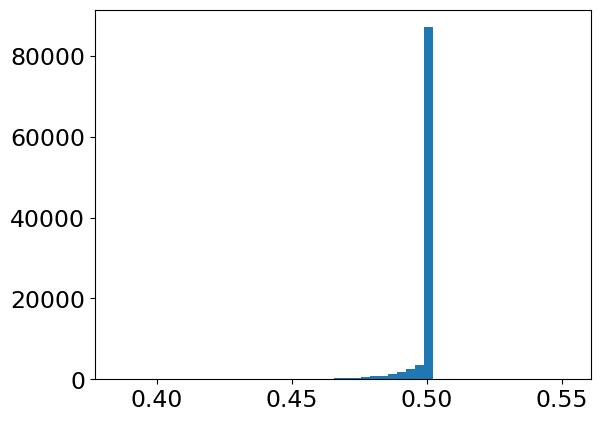

[[ 3.86065540e-05 -3.17590605e-06]
 [-3.17590605e-06  2.50002442e-01]]


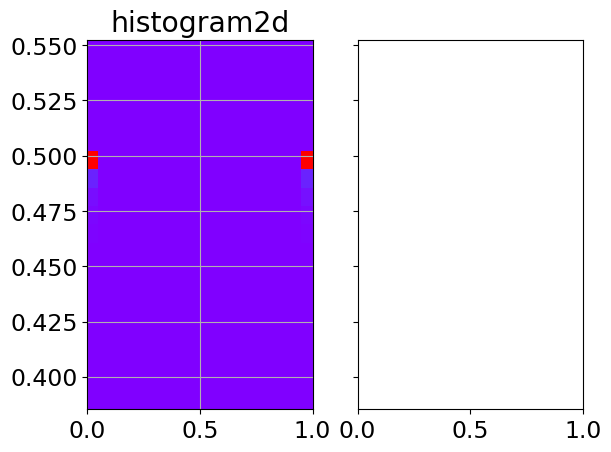

In [5]:

i = 10
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



i = 1
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



t = 4
print(f'power mean {np.mean(model.sim.power,0)}')
print(f'power min {np.min(model.sim.power,0)}')
print(f'power max {np.max(model.sim.power,0)}')
print(f'Kw {np.max(model.sim.Kw,0)}')


I = model.sim.couple[:,t]<1.0
nan = np.zeros(I.shape)
nan[I] = np.nan
print(nan)

init_barg = model.sim.init_Kw > model.sim.init_Km
init_barg = init_barg+nan

sim_power= model.sim.power[:,t]
sim_power= sim_power+ nan



print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t]))

print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t-1]))

print(np.cov(model.sim.Kw[:,t-1],model.sim.labor_w[:,t]))


print(init_barg)
plt.hist(model.sim.power[:,t], bins = 50 )
plt.show()

print(np.cov(model.sim.power[:,t],init_barg))
H, yedges, xedges = np.histogram2d(model.sim.power[:,t], init_barg, bins=20)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.pcolormesh(xedges, yedges, H, cmap='rainbow')
ax1.set_title('histogram2d')
ax1.grid()
plt.show()

0.5555555555555554
[-3.69668847 -3.68023353 -3.66185583 -3.64516038 -3.6274674  -3.60996375
 -3.59072844 -3.5736147  -3.55608878 -3.53866305 -3.5192767  -3.50114297
 -3.48282666 -3.4652961  -3.44391987 -3.42192934 -3.40402895 -3.38118695
 -3.36705621 -3.3419043  -3.32950946 -3.2956573  -3.27386629 -3.25148029
 -3.22897925 -3.20655835 -3.18326691 -3.16028367 -3.13665417 -3.11335062
 -3.09080837 -3.06611158 -3.04132738 -3.01677017 -2.99207666 -2.96667663
 -2.94058882 -2.91439015 -2.88732432 -2.86058903 -2.83272482 -2.80381241
 -2.77429624 -2.7432863  -2.71173262 -2.68065853 -2.64472561 -2.60784554
 -2.5681971  -2.52304357]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan 

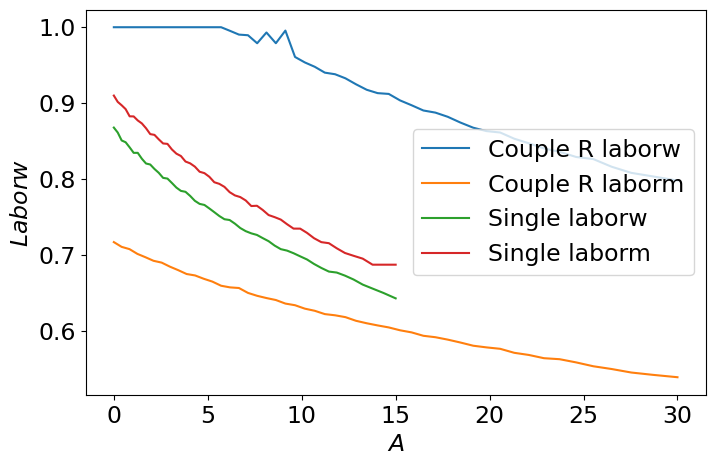

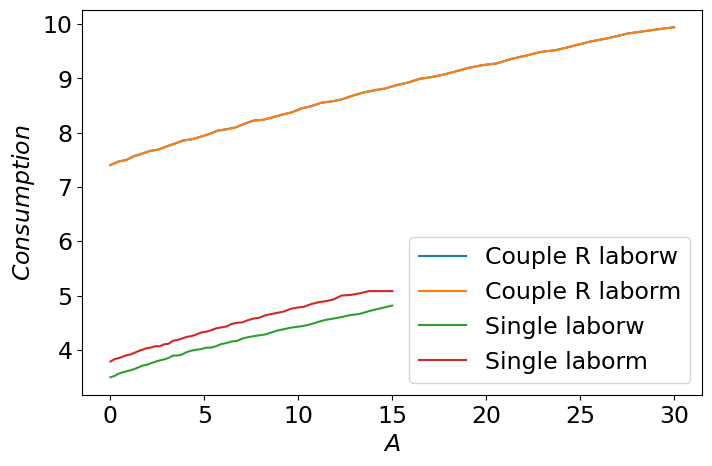

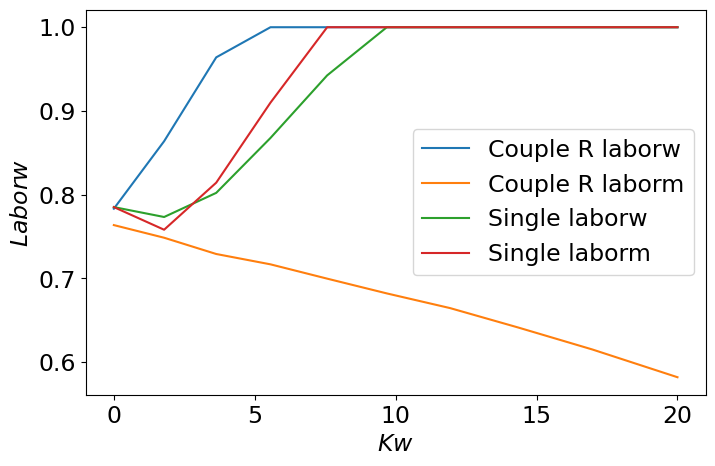

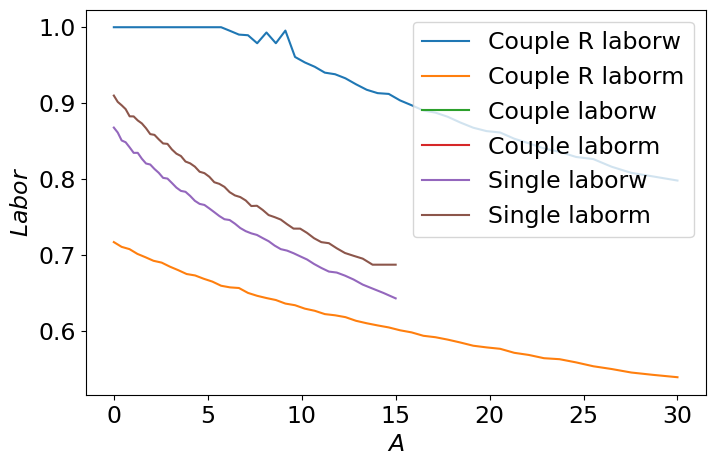

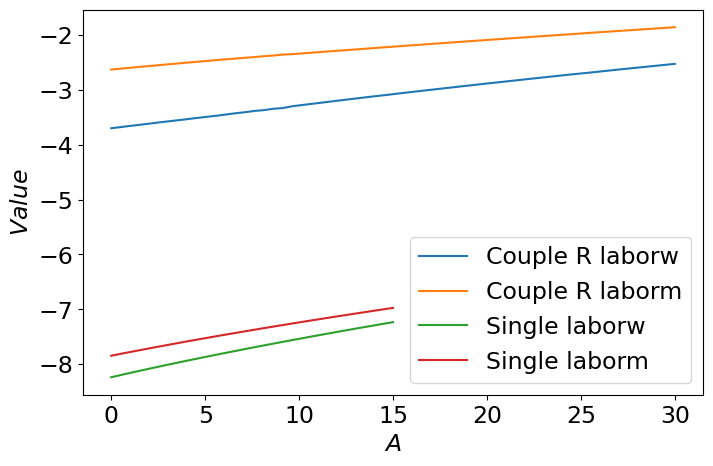

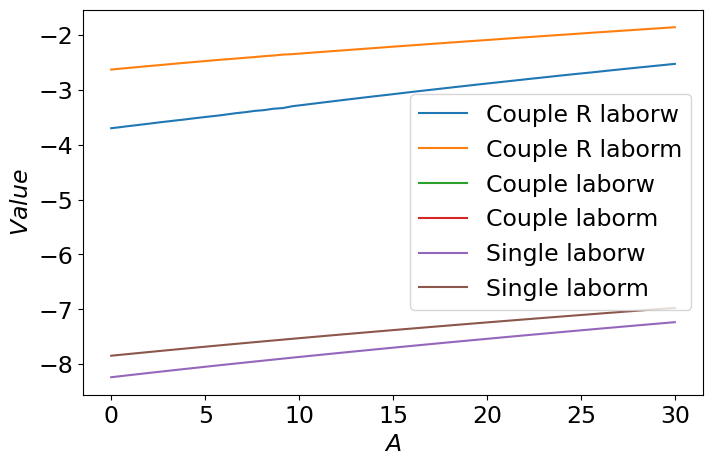

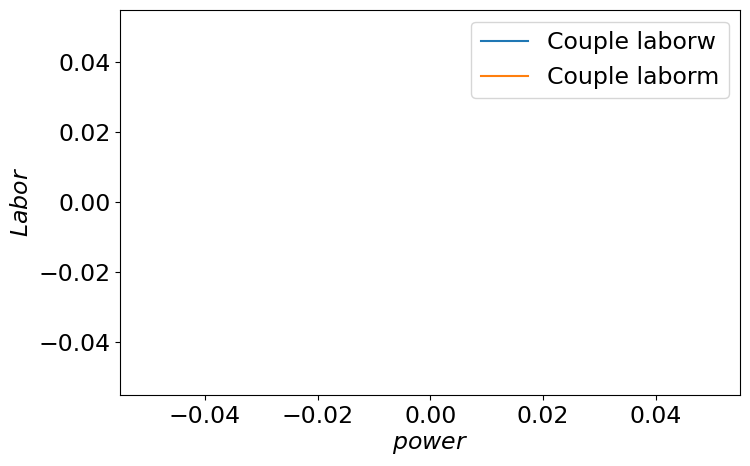

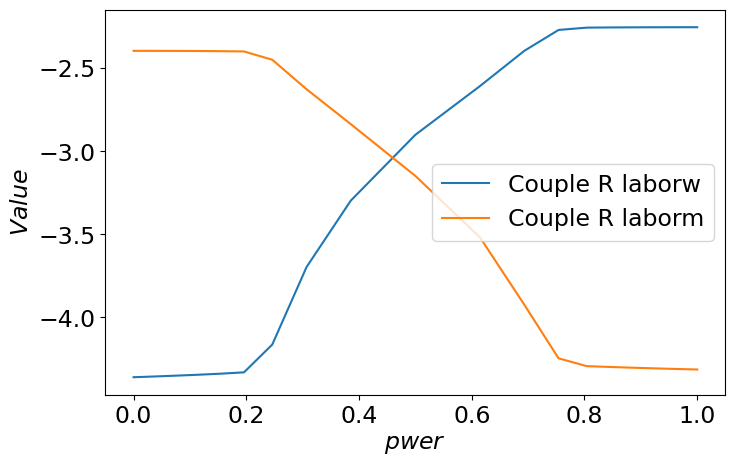

-8.23890915199976
-7.8466375354244295


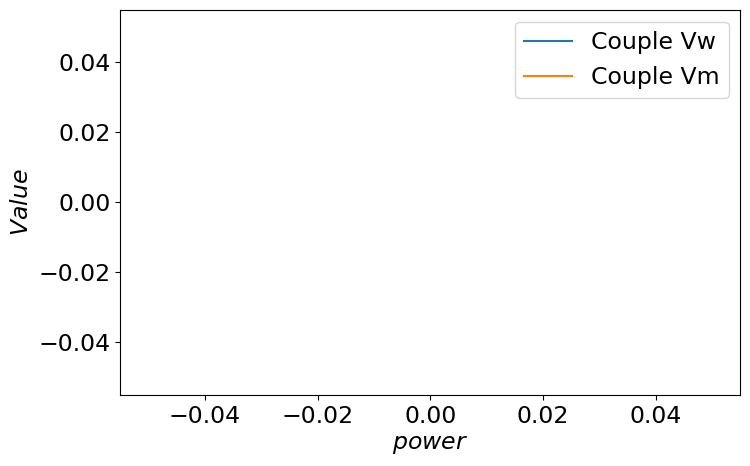

In [17]:
i_P = 8
#i_P = 8
i_A = 0
i_L = 7
i_t = 1
i_HKw = 3
i_HKm = 3
t = i_t


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_single[t,:,i_HKm])


sol = models['model_NC'].sol
par = models['model_NC'].par
print(par.grid_love[i_L])

print(sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.Vw_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.labor_w_single[t,:,i_HKw])
print(sol.labor_m_single[t,:,i_HKw])


print(sol.Vw_single[t,:,i_HKw])




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_Aw,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.cons_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.cons_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_Aw,sol.cons_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.cons_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Consumption$")
plt.legend()
plt.show()




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.labor_w_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_K,sol.labor_m_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_K,sol.labor_w_single[t,i_A,:], label = 'Single laborw')
ax.plot(par.grid_K,sol.labor_m_single[t,i_A,:], label = 'Single laborm')                      
ax.set_xlabel(f"$Kw$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.labor_m_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_Aw,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_Aw,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_Am,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.Vm_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.labor_w_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_power,sol.labor_m_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple laborm')
ax.set_xlabel(f"$power$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.Vw_remain_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_power,sol.Vm_remain_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple R laborm')
ax.set_xlabel(f"$pwer$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()

print(sol.Vw_single[t,i_A,i_HKw])
print(sol.Vm_single[t,i_A,i_HKm])
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.Vw_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple Vw')
ax.plot(par.grid_power,sol.Vm_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple Vm')                   
ax.set_xlabel(f"$power$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()




# Estimate the model

In [7]:
#Save the data 
model = models['model NC, NO_HK ']
model.sim.init_love[:] =0.1
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data1 = Estimate.create_data_new(model,start_p = 9, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_NO_HK4')


In [18]:
#Save the data 
#model = models['model LC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_LC_NO_HK2')


model = models['model LC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_LC_HK')

#model = models['model NC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_NO_HK2')


model = models['model NC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_HK')

#Save the data 
#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_FC_NO_HK2')


model = models['model FC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_FC_HK')


In [6]:

#Estimate the model one time
data_reg = Estimate.aux_est(data2,print_reg=True)
data_reg, Wald_FC, Wald_NC = Estimate.main_est(data_reg,print_reg=True) 

c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ZeroDivisionError: float division by zero